In [54]:
fi = open("../CameraTrajectory.txt", "r")
data = fi.readlines()
data = [map(float, d.split(" ")) for d in data]

_, x, y, z, _, _, _, _ = zip(*data)

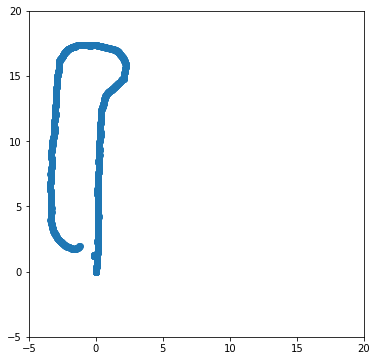

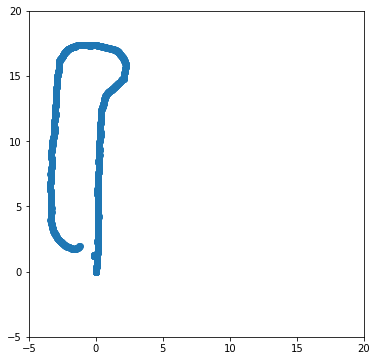

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot(x, y, xlim, ylim):
    fig = plt.figure(figsize=(6, 6))

    ax = fig.add_subplot(111)
    ax.scatter(x, y)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    plt.show()
    
def plot3d(x, y, z):
    fig = plt.figure(figsize=(6, 6))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    plt.show()

# plot(x, y, (-2, 6), (-2, 14))
# plot(y, z, (-2, 6), (-2, 14))
# plot3d(x, y, z)

# for i in range(0, len(x), 100):
#     fig = plt.figure(figsize=(6, 6))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(x[i:i+100], y[i:i+100], z[i:i+100])
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    
#     plt.show()

lim = (-5, 20)

plot(x, z, lim, lim)
import math
theta = -0.0 /180*math.pi
cos = math.cos(theta)
sin = math.sin(theta)
rot = np.array([[cos, -sin],
                [sin, cos]])
xz = zip(x, z)
rotx, rotz = zip(*(np.matmul(rot, xzi) for xzi in xz))
plot(rotx, rotz, lim, lim)

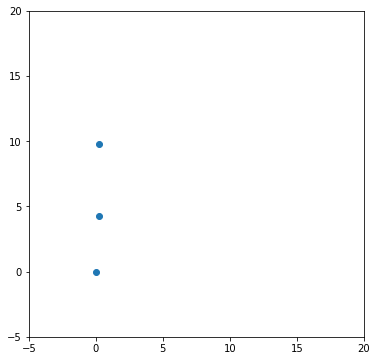

[(0.0, 0.0), (0.195385367, 4.260733604), (0.2326352, 9.760836601)]

In [62]:
chosen = [0, 250, 500]

xy = zip(rotx, rotz)
chosen_xy = [xy[c] for c in chosen]
chosen_xy
chosen_x, chosen_y = zip(*chosen_xy)
plot(chosen_x, chosen_y, lim, lim)
chosen_xy

In [68]:
# TA = B

import numpy as np
from numpy.linalg import inv

xy = zip(x, z)

A = np.array([list(xy[c]) + [1.0] for c in chosen]).transpose()

visual_2d_coords = [
    [5.0, 18.0],
    [5.195385367, 18.0-4.260733604],
    [5.2326352, 18.0-9.760836601],
]

B = np.array([v2dc + [1.0] for v2dc in visual_2d_coords]).transpose()

# T = BA^-1

T = np.matmul(B, inv(A))
T.resize((1, 9))
T

array([[ 1.00000000e+00, -2.22044605e-16,  5.00000000e+00,
         0.00000000e+00, -1.00000000e+00,  1.80000000e+01,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

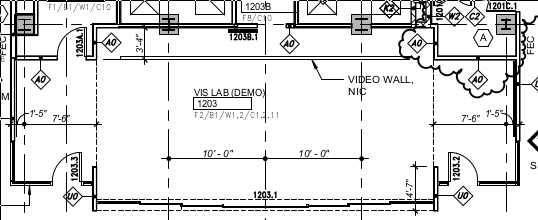

In [1]:
# import cv2 as cv
# img = cv.imread("floorplan.png")
# cv.imshow("image", img)
from PIL import Image
img = Image.open("floorplan.png")
img